<a href="https://colab.research.google.com/github/SayakKDutta/SayakKDutta/blob/main/Chess_com_Rapid_Rating_Sayak_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install asciichartpy

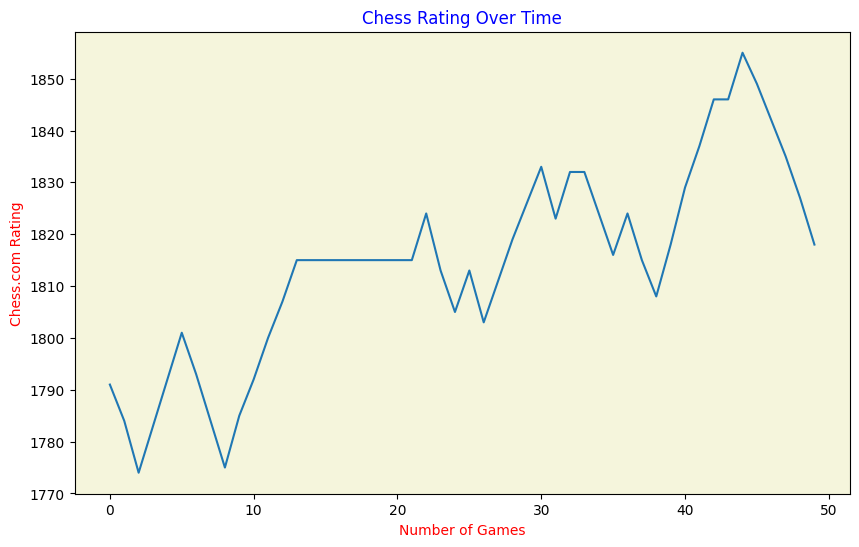

In [4]:
import datetime
import math
import requests
import matplotlib.pyplot as plt

USERNAME = 'Sayak_k'
TIME_CLASS = 'rapid'
RULES = 'chess'
NGAMES = 50
headers = {"User-Agent": "ChessRatingRefresh/1.0 sayak.kr.dutta@gmail.com"}
ARCHIVES_URL = 'https://api.chess.com/pub/player/{user}/games/archives'

def get_archives() -> list:
    archives_dict = requests.get(url=ARCHIVES_URL.format(user=USERNAME), headers=headers).json()
    monthly_archives = archives_dict.get('archives')
    if monthly_archives is None:
        return []
    return monthly_archives[::-1]

def get_filtered_games(monthly_archive_url: str) -> list:
    games_dict = requests.get(url=monthly_archive_url, headers=headers).json()
    monthly_games = games_dict.get('games')
    if monthly_games is None:
        return []
    _filtered_games = list(filter(lambda game: game['time_class'] == TIME_CLASS, monthly_games))
    filtered_games = list(filter(lambda game: game['rules'] == RULES, _filtered_games))
    return filtered_games[::-1]

def get_ratings_from_games(games: list) -> list:
    ratings = []
    for game in games:
        if game['white']['username'] == USERNAME:
            ratings.append(game['white']['rating'])
        else:
            ratings.append(game['black']['rating'])
    return ratings[::-1]

def main():
    final_games = []
    archives = get_archives()
    for archive in archives:
        games = get_filtered_games(archive)
        if games:
            final_games += games
        if len(final_games) >= NGAMES:
            break
    final_games = final_games[:NGAMES]
    ratings_list = get_ratings_from_games(final_games)

    plt.figure(figsize=(10, 6))
    plt.plot(ratings_list)
    plt.title('Chess Rating Over Time', color='blue')
    plt.xlabel('Number of Games', color='red')
    plt.ylabel('Chess.com Rating', color='red')
    plt.grid(False)
    plt.gca().set_facecolor('beige')  # Set background color

    # Save the plot as a PNG file named plot.png
    plt.savefig('plot.png')

if __name__ == "__main__":
    main()
